In [1]:
import numpy as np
import scipy
import pandas
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
sns.set_style('ticks')
sns.set_context('notebook')
import h5py
import allel; print('scikit-allel', allel.__version__)

scikit-allel 1.2.1


In [2]:
#allel.vcf_to_hdf5('/media/scervant/Transcend/GenTree_GM/Pinus_pinaster/Ppinaster_raw_SNPs.vcf', '/media/scervant/Transcend/GenTree_GM/Pinus_pinaster/Ppinaster_raw_SNPs.h5', fields='*', overwrite=True)

In [3]:
callset_fn = '/media/scervant/Transcend/GenTree_GM/Pinus_pinaster/Ppinaster_raw_SNPs.h5'
callset = h5py.File(callset_fn, mode='r')
callset

<HDF5 file "Ppinaster_raw_SNPs.h5" (mode r)>

In [4]:
sorted(callset.keys())

['calldata', 'samples', 'variants']

In [5]:
variants = allel.VariantChunkedTable(callset['variants'], 
                                     names=['POS', 'REF', 'ALT','DP', 'QUAL', 'AN', 'MQ', 'QD', 'SOR', 'MQRankSum', 'ReadPosRankSum', 'numalt'])
variants

<VariantChunkedTable shape=(2297077,) dtype=[('POS', '<i4'), ('REF', 'O'), ('ALT', 'O', (3,)), ('DP', '<i4'), ('QUAL', '<f4'), ('AN', '<i4'), ('MQ', '<f4'), ('QD', '<f4'), ('SOR', '<f4'), ('MQRankSum', '<f4'), ('ReadPosRankSum', '<f4'), ('numalt', '<i4')]
   nbytes=157.7M cbytes=61.1M cratio=2.6
   values=h5py._hl.group.Group>

In [5]:
#callset['variants']
#list(variants)

In [6]:
callset['samples']

<HDF5 dataset "samples": shape (1080,), type "|O">

In [7]:
variants = callset['variants']
variants

<HDF5 group "/variants" (29 members)>

In [8]:
#list(variants)

In [12]:
#numalt = variants['numalt'][:]
#numalt

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [8]:
def plot_variant_hist(f, bins=30):
    x = variants[f][:]
    fig, ax = plt.subplots(figsize=(7, 5))
    sns.despine(ax=ax, offset=10)
    ax.hist(x, bins=bins)
    ax.set_xlabel(f)
    ax.set_ylabel('No. variants')
    ax.set_title('Variant %s distribution' % f)

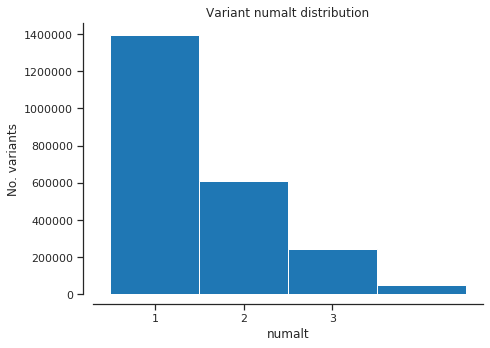

In [9]:
plot_variant_hist('numalt', bins=np.arange(0.5, 5.5, 1))
plt.gca().set_xticks([1,2,3])

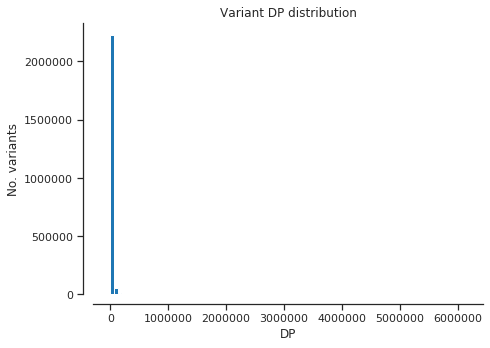

In [10]:
plot_variant_hist('DP', bins=100)

/wrk/Programs/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/wrk/Programs/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


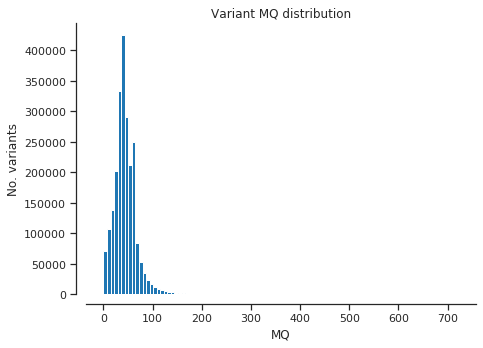

In [11]:
plot_variant_hist('MQ', bins=100)

In [17]:
MQ = variants['MQ'][:]
MQ

array([41.13, 39.93, 42.16, ..., 16.69, 13.5 , 11.65], dtype=float32)

/wrk/Programs/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/wrk/Programs/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


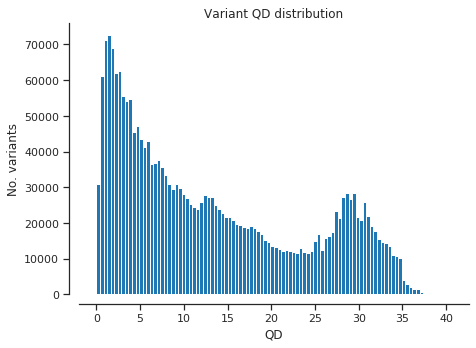

In [13]:
plot_variant_hist('QD', bins=100)
plt.savefig('/wrk/Gen_Tree/GenTree_Genome_mapping/Pinus_pinaster/Ppinaster_GM_QD_distribution')

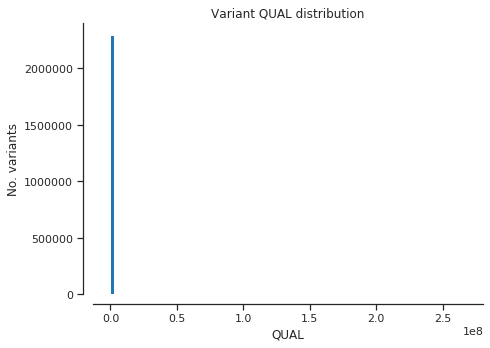

In [14]:
plot_variant_hist('QUAL', bins=100)

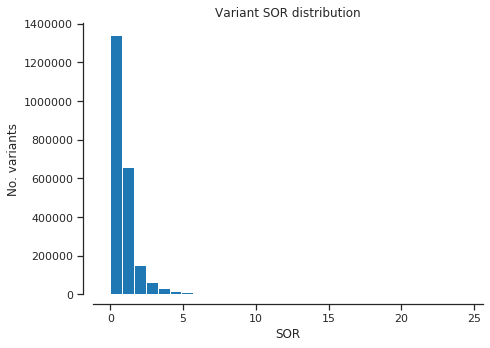

In [15]:
plot_variant_hist('SOR')

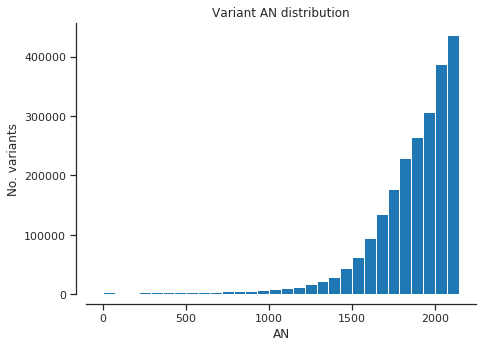

In [17]:
plot_variant_hist('AN')
plt.savefig('/wrk/Gen_Tree/GenTree_Genome_mapping/Pinus_pinaster/Ppinaster_GM_AN_distribution')

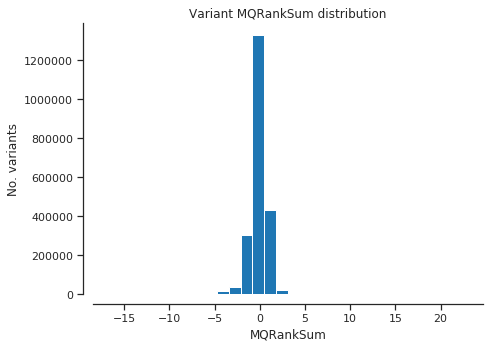

In [18]:
plot_variant_hist('MQRankSum')

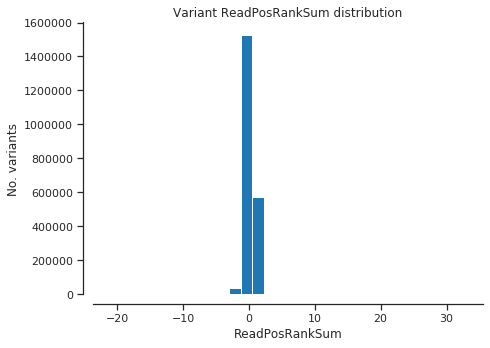

In [19]:
plot_variant_hist('ReadPosRankSum')

In [20]:
samples = callset['samples']
list(samples)

['ARZ-29-01b5',
 'ARZ-29-02b5',
 'ARZ-29-04b5',
 'ARZ-29-05b5',
 'ARZ-29-06b5',
 'ARZ-29-07b5',
 'ARZ-29-08b5',
 'ARZ-29-09b5',
 'ARZ-29-11b5',
 'ARZ-29-12b5',
 'ARZ-29-13b5',
 'ARZ-29-14b5',
 'AUL-10-01b2',
 'AUL-10-01b4',
 'AUL-10-01b5',
 'AUL-10-02b2',
 'AUL-10-02b4',
 'AUL-10-02b5',
 'AUL-10-05b2',
 'AUL-10-05b4',
 'AUL-10-05b5',
 'AUL-10-06b2',
 'AUL-10-06b4',
 'AUL-10-06b5',
 'AUL-10-07b2',
 'AUL-10-07b4',
 'AUL-10-07b5',
 'AUL-10-08b2',
 'AUL-10-08b4',
 'AUL-10-08b5',
 'AUL-10-09b2',
 'AUL-10-09b4',
 'AUL-10-09b5',
 'AUL-10-11b2',
 'AUL-10-11b4',
 'AUL-10-11b5',
 'AUL-10-12b2',
 'AUL-10-12b4',
 'AUL-10-12b5',
 'AUL-10-14b2',
 'AUL-10-14b4',
 'AUL-10-14b5',
 'AUL-10-16b2',
 'AUL-10-16b4',
 'AUL-10-16b5',
 'AUL-10-18b2',
 'AUL-10-18b4',
 'AUL-10-18b5',
 'AUL10-01',
 'BAV-33-01b2',
 'BAV-33-01b3',
 'BAV-33-01b4',
 'BAV-33-02b2',
 'BAV-33-02b3',
 'BAV-33-02b4',
 'BAV-33-03b2',
 'BAV-33-03b3',
 'BAV-33-03b4',
 'BAV-33-04b2',
 'BAV-33-04b3',
 'BAV-33-04b4',
 'BAV-33-05b2',
 'BAV-33-05

In [9]:
samples_fn = '/wrk/Gen_Tree/Pinus_pinaster/metadata_Pinastr_for_scikit_SORTED.txt'
samples = pandas.read_csv(samples_fn, sep='\t')
samples.head()

,ID,Population
0,ES-PP-01-01,ES-PP-1
1,ES-PP-01-02,ES-PP-1
2,ES-PP-01-03,ES-PP-1
3,ES-PP-01-04,ES-PP-1
4,ES-PP-01-05,ES-PP-1


In [10]:
samples.Population.value_counts()

FR-PP-13    25
IT-PP-18    25
IT-PP-19    25
IT-PP-20    25
ES-PP-4     25
IT-PP-15    25
FR-PP-9     25
FR-PP-11    25
IT-PP-16    25
IT-PP-17    25
ES-PP-5     25
FR-PP-10    25
ES-PP-2     25
ES-PP-3     25
ES-PP-1     25
FR-PP-14    25
ES-PP-8     25
ES-PP-7     25
ES-PP-6     25
TMJT        24
SiMe        24
LCor        24
FR-PP-12    24
Leir        19
Tunisia      8
FR-PP-16     1
Name: Population, dtype: int64

In [11]:
calldata = callset['calldata']

In [12]:
genotypes = allel.GenotypeChunkedArray(calldata['GT'])
genotypes

<GenotypeChunkedArray shape=(2263634, 599, 2) dtype=int8 chunks=(65536, 64, 2)
   nbytes=2.5G cbytes=271.3M cratio=9.5
   compression=gzip compression_opts=1
   values=h5py._hl.dataset.Dataset>

In [13]:
ac = genotypes.count_alleles()
ac

<AlleleCountsChunkedArray shape=(2263634, 2) dtype=int32 chunks=(70739, 2)
   nbytes=17.3M cbytes=5.7M cratio=3.0
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [36]:
#biallelic = (ac.max_allele() == 1)

In [37]:
#genotypes_Biallelic_subset = genotypes.compress(biallelic)
#genotypes_Biallelic_subset

In [34]:
n_variants = len(genotypes)
n_variants

2263634

In [35]:
pc_missing = genotypes.count_missing(axis=0)[:] * 100 / n_variants
pc_het = genotypes.count_het(axis=0)[:] * 100 / n_variants
#pc_missing

In [14]:
samples

,ID,Population
0,ES-PP-01-01,ES-PP-1
1,ES-PP-01-02,ES-PP-1
2,ES-PP-01-03,ES-PP-1
3,ES-PP-01-04,ES-PP-1
4,ES-PP-01-05,ES-PP-1
5,ES-PP-01-06,ES-PP-1
6,ES-PP-01-07,ES-PP-1
7,ES-PP-01-08,ES-PP-1
8,ES-PP-01-09,ES-PP-1
9,ES-PP-01-10,ES-PP-1


In [15]:
samples.Population.unique()

array(['ES-PP-1', 'ES-PP-2', 'ES-PP-3', 'ES-PP-4', 'ES-PP-5', 'ES-PP-6',
       'ES-PP-7', 'ES-PP-8', 'FR-PP-9', 'FR-PP-10', 'FR-PP-11',
       'FR-PP-12', 'FR-PP-13', 'FR-PP-14', 'FR-PP-16', 'IT-PP-15',
       'IT-PP-16', 'IT-PP-17', 'IT-PP-18', 'IT-PP-19', 'IT-PP-20', 'LCor',
       'Leir', 'SiMe', 'TMJT', 'Tunisia'], dtype=object)

In [40]:
samples.Population

0      ES-PP-1
1      ES-PP-1
2      ES-PP-1
3      ES-PP-1
4      ES-PP-1
5      ES-PP-1
6      ES-PP-1
7      ES-PP-1
8      ES-PP-1
9      ES-PP-1
10     ES-PP-1
11     ES-PP-1
12     ES-PP-1
13     ES-PP-1
14     ES-PP-1
15     ES-PP-1
16     ES-PP-1
17     ES-PP-1
18     ES-PP-1
19     ES-PP-1
20     ES-PP-1
21     ES-PP-1
22     ES-PP-1
23     ES-PP-1
24     ES-PP-1
25     ES-PP-2
26     ES-PP-2
27     ES-PP-2
28     ES-PP-2
29     ES-PP-2
        ...   
569       TMJT
570       TMJT
571       TMJT
572       TMJT
573       TMJT
574       TMJT
575       TMJT
576       TMJT
577       TMJT
578       TMJT
579       TMJT
580       TMJT
581       TMJT
582       TMJT
583       TMJT
584       TMJT
585       TMJT
586       TMJT
587       TMJT
588       TMJT
589       TMJT
590       TMJT
591    Tunisia
592    Tunisia
593    Tunisia
594    Tunisia
595    Tunisia
596    Tunisia
597    Tunisia
598    Tunisia
Name: Population, Length: 599, dtype: object

In [16]:
def plot_genotype_frequency(pc, title):
    fig, ax = plt.subplots(figsize=(24, 5))
    sns.despine(ax=ax, offset=24)
    left = np.arange(len(pc))
    palette = sns.color_palette("hls", 30)
    pop2color = {'ES-PP-1': palette[7],
                 'ES-PP-2': palette[1],
                 'ES-PP-3': palette[2],
                 'ES-PP-4': palette[3],
                 'ES-PP-5': palette[4],
                 'ES-PP-6': palette[25],
                 'ES-PP-7': palette[6],
                 'ES-PP-8': palette[0],
                 'FR-PP-9': palette[8],
                 'FR-PP-10': palette[16],
                 'FR-PP-11': palette[23],
                 'FR-PP-12': palette[11],
                 'FR-PP-13': palette[20],
                 'FR-PP-14': palette[13],
                 'FR-PP-16': palette[15],
                 'IT-PP-15': palette[9],
                 'IT-PP-16': palette[17],
                 'IT-PP-17': palette[21],
                 'IT-PP-18': palette[19],
                 'IT-PP-19': palette[12],
                 'IT-PP-20': palette[18],
                 'LCor': palette[22],
                 'Leir': palette[10],
                 'SiMe': palette[24],
                 'TMJT': palette[5],
                 'Tunisia': palette[26]}
    colors = [pop2color[p] for p in samples.Population]
    ax.bar(left, pc, color=colors)
    ax.set_xlim(0, len(pc))
    ax.set_xlabel('Sample index')
    ax.set_ylabel('Percent calls')
    ax.set_title(title)
    handles = [mpl.patches.Patch(color=palette[7]),
               mpl.patches.Patch(color=palette[1]),
               mpl.patches.Patch(color=palette[2]),
               mpl.patches.Patch(color=palette[3]),
               mpl.patches.Patch(color=palette[4]),
               mpl.patches.Patch(color=palette[25]),
               mpl.patches.Patch(color=palette[6]),
               mpl.patches.Patch(color=palette[0]),
               mpl.patches.Patch(color=palette[8]),
               mpl.patches.Patch(color=palette[9]),
               mpl.patches.Patch(color=palette[23]),
               mpl.patches.Patch(color=palette[11]),
               mpl.patches.Patch(color=palette[20]),
               mpl.patches.Patch(color=palette[13]),
               mpl.patches.Patch(color=palette[15]),
               mpl.patches.Patch(color=palette[16]),
               mpl.patches.Patch(color=palette[17]),
               mpl.patches.Patch(color=palette[21]),
               mpl.patches.Patch(color=palette[19]),
               mpl.patches.Patch(color=palette[12]),
               mpl.patches.Patch(color=palette[18]),
               mpl.patches.Patch(color=palette[22]),
               mpl.patches.Patch(color=palette[10]),
               mpl.patches.Patch(color=palette[24]),
               mpl.patches.Patch(color=palette[5]),
               mpl.patches.Patch(color=palette[26])]
    ax.legend(handles=handles, labels=['ES-PP-1', 'ES-PP-2', 'ES-PP-3', 'ES-PP-4', 'ES-PP-5', 'ES-PP-6',
       'ES-PP-7', 'ES-PP-8', 'FR-PP-9', 'FR-PP-10', 'FR-PP-11',
       'FR-PP-12', 'FR-PP-13', 'FR-PP-14', 'FR-PP-16', 'IT-PP-15',
       'IT-PP-16', 'IT-PP-17', 'IT-PP-18', 'IT-PP-19', 'IT-PP-20', 'LCor',
       'Leir', 'SiMe', 'TMJT', 'Tunisia'], title='Population',
              bbox_to_anchor=(1, 1), loc='upper left')

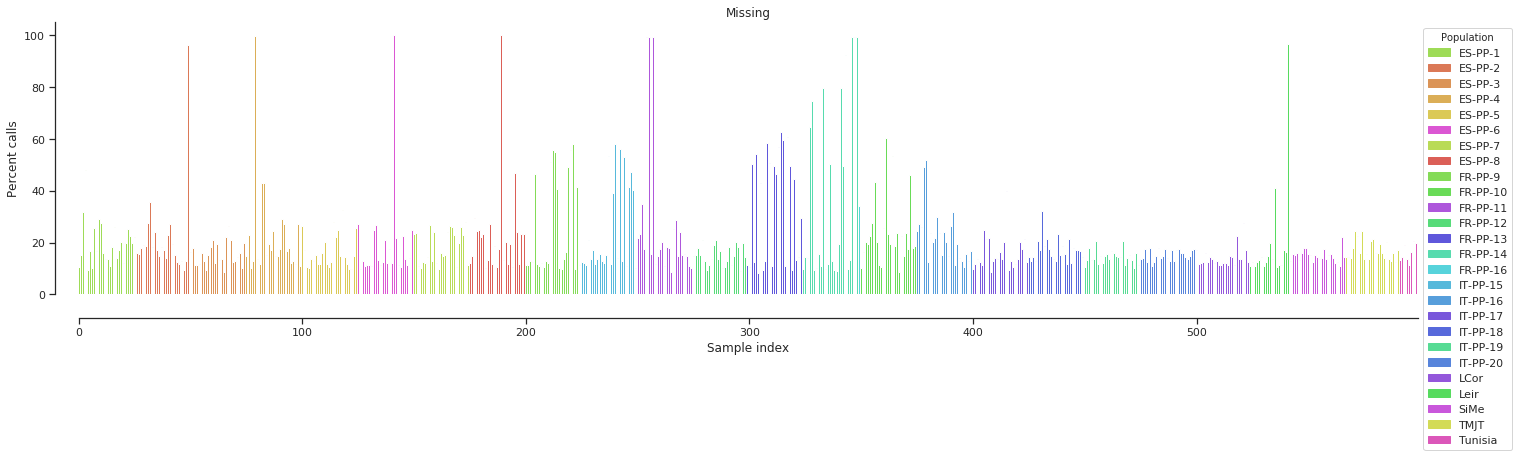

In [63]:
plot_genotype_frequency(pc_missing, 'Missing')
plt.savefig('/wrk/Gen_Tree/Pinus_pinaster/Ppinaster_Missing_data_per_sample.pdf')

In [51]:
np.argsort(pc_missing)[-1]

141

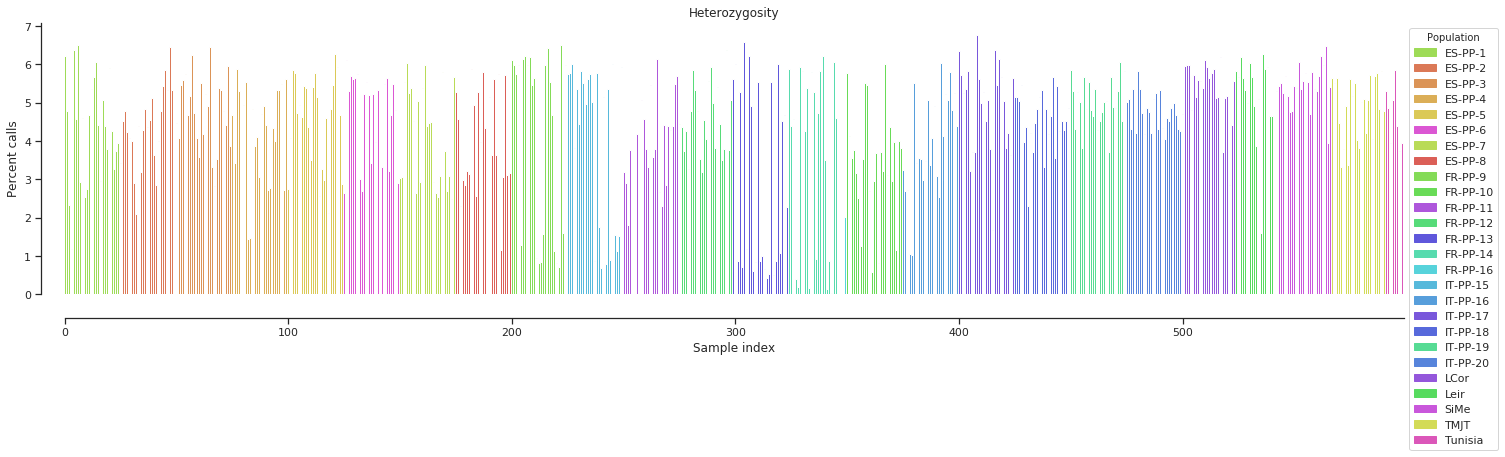

In [64]:
plot_genotype_frequency(pc_het, 'Heterozygosity')
plt.savefig('/wrk/Gen_Tree/Pinus_pinaster/Ppinaster_Heterozygosity.pdf')

In [17]:
palette = sns.color_palette("hls", 30)
pop_colours = {'ES-PP-1': palette[7],
                 'ES-PP-2': palette[1],
                 'ES-PP-3': palette[2],
                 'ES-PP-4': palette[3],
                 'ES-PP-5': palette[4],
                 'ES-PP-6': palette[25],
                 'ES-PP-7': palette[6],
                 'ES-PP-8': palette[0],
                 'FR-PP-9': palette[8],
                 'FR-PP-10': palette[16],
                 'FR-PP-11': palette[23],
                 'FR-PP-12': palette[11],
                 'FR-PP-13': palette[20],
                 'FR-PP-14': palette[13],
                 'FR-PP-16': palette[15],
                 'IT-PP-15': palette[9],
                 'IT-PP-16': palette[17],
                 'IT-PP-17': palette[21],
                 'IT-PP-18': palette[19],
                 'IT-PP-19': palette[12],
                 'IT-PP-20': palette[18],
                 'LCor': palette[22],
                 'Leir': palette[10],
                 'SiMe': palette[24],
                 'TMJT': palette[5],
                 'Tunisia': palette[26]}

In [18]:
def plot_pca_coords(coords, model, pc1, pc2, ax, sample_population):
    sns.despine(ax=ax, offset=5)
    x = coords[:, pc1]
    y = coords[:, pc2]
    for pop in populations:
        flt = (sample_population == pop)
        ax.plot(x[flt], y[flt], marker='o', linestyle=' ', color=pop_colours[pop], 
                label=pop, markersize=6, mec='k', mew=.5)
    ax.set_xlabel('PC%s (%.1f%%)' % (pc1+1, model.explained_variance_ratio_[pc1]*100))
    ax.set_ylabel('PC%s (%.1f%%)' % (pc2+1, model.explained_variance_ratio_[pc2]*100))
    
def fig_pca(coords, model, title, sample_population=None):
    if sample_population is None:
        sample_population = samples.Population.values
    # plot coords for PCs 1 vs 2, 3 vs 4
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(1, 2, 1)
    plot_pca_coords(coords, model, 0, 1, ax, sample_population)
    ax = fig.add_subplot(1, 2, 2)
    plot_pca_coords(coords, model, 2, 3, ax, sample_population)
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
    fig.suptitle(title, y=0.97)

In [19]:
flt = (ac[:, :2].min(axis=1) > 1)
gf = genotypes.compress(flt, axis=0)
gn = gf.to_n_alt()
gn

<ChunkedArrayWrapper shape=(1889864, 599) dtype=int8 chunks=(3692, 599)
   nbytes=1.1G cbytes=151.2M cratio=7.1
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [20]:
coords1, model1 = allel.pca(gn, n_components=10, scaler='patterson')

MemoryError: 

In [ ]:
fig_pca(coords1, model1, 'Figure 1. Conventional PCA.')